# <b> Análise de  dados do Google PlayStore<b>


In [161]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
import colorsys
plt.style.use('seaborn-talk')
%matplotlib inline 

## <b>Informações iniciais sobre o conjunto de dados

In [162]:
# carregando o conjunto de dados
data = pd.read_csv('dataset/googleplaystore.csv')

In [163]:
# visualizando as primeiras colunas
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [164]:
# visualizando uma estatística básica sobre o conjunto de dados
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [165]:
# visualizando o nome das colunas
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [166]:
# visualizando a forma do conjunto de dados (quantidade de linhas e colunas)
data.shape

(10841, 13)

In [167]:
# visualizando o tipo de dados de cada coluna
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## <b><blue>Limpeza dos dados</blue><b>

In [168]:
# verificando a ocorrência de valores nulos
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [169]:
# verificando os tipos 
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### <b>Tratando os valores da coluna Rating

In [170]:
# visualizando os valores da coluna que tem 1474 valores nulos
data['Rating'].head(25)

0     4.1
1     3.9
2     4.7
3     4.5
4     4.3
5     4.4
6     3.8
7     4.1
8     4.4
9     4.7
10    4.4
11    4.4
12    4.2
13    4.6
14    4.4
15    3.2
16    4.7
17    4.5
18    4.3
19    4.6
20    4.0
21    4.1
22    4.7
23    NaN
24    4.7
Name: Rating, dtype: float64

In [171]:
# aplicando a média dos valores para os campos faltantes
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())
data['Rating'] = data['Rating'].replace({19.000000: 1.900000}) #valor fora do limite identificado

In [172]:
# verificando os nulos
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [173]:
# verificando os tipos
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### <b>Tratando os valores da coluna Reviews

In [174]:
# convertendo a coluna para numeric
data['Reviews'] = data['Reviews'].apply(pd.to_numeric, errors='coerce')

In [175]:
data['Reviews'].head(10)

0       159.0
1       967.0
2     87510.0
3    215644.0
4       967.0
5       167.0
6       178.0
7     36815.0
8     13791.0
9       121.0
Name: Reviews, dtype: float64

In [176]:
# verificando os nulos
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           1
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [177]:
# preenchendo o valor restante com a media ds valores
value = (data['Rating'].mean())
value

4.19176097009894

In [178]:
# substituindo os nulos pela média
data['Reviews'] = data['Reviews'].replace({np.nan:value})

In [179]:
# verificando os nulos
data['Reviews'].isnull().sum()

0

In [180]:
# verificando os tipos
data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### <b>Tratando os valores da coluna Price

In [181]:
# verificando os nulos
data['Price'].isnull().sum()

0

In [182]:
# removendo o primeiro caractere ($)
price = data['Price']
price = [x[1:] for x in data['Price']]

In [183]:
# convertendo em numérico e corrigindo os zeros que ficaram NaN após a conversão
data['Price'] = price
data['Price'] = data['Price'].apply(pd.to_numeric, errors='coerce')
data['Price'] = data['Price'].replace({np.nan: 0})

In [184]:
# verificando os nulos
data['Price'].isnull().sum()

0

In [185]:
# verificando os tipos
data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### <b>Tratando a coluna Size:
#### M para os megabytes
#### k para os kylobytes
#### 0 varia conforme o dispositivo


In [186]:
# Visualizando os primeiros valores de Size
data['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [187]:
# Substituindo o valor 'Varies with device' pelo valor 0
data['Size'] = data['Size'].replace({'Varies with device': '000'})

In [188]:
# Substituindo o valor com +
data['Size'] = data['Size'].replace({'1,000+': '1.000'})

In [189]:
# Visualizar todas as linhas
pd.set_option('display.max_rows', None)
data['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [190]:
# Pegando o último valor de cada elemento da lista de 'Size'
slicingEnd = [s[-1] for s in data['Size']]
slicingBegin = [s[:-1] for s in data['Size']]

In [191]:
# Verificando 
slicingBegin[0]

'19'

In [192]:
slicingEnd[0]

'M'

In [193]:
# Convertendo os valores em float e convertendo os k em MegaBytes
for i in range(0, data['Size'].size):      
    if(slicingEnd[i] == 'k'): 
        slicingBegin[i]= float(slicingBegin[i])/1024
        round(slicingBegin[i],2)
    else:
         slicingBegin[i]= float(slicingBegin[i])        

In [194]:
# Atualizando os valores no dataset
data['Size'] = slicingBegin
data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [195]:
# Após a limpeza dos dados a coluna Size pode ser convertida
data['Size'] = data['Size'].apply(pd.to_numeric, errors='coerce')
data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [196]:
# verificando os nulos
data['Size'].isnull().sum()

0

### <b>Para tratar a coluna Installs:

In [197]:
# verificando os nulos
data['Installs'].isnull().sum()

0

In [198]:
# Visualizando os dez primeiros valores
data['Installs'].head(10)

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
5        50,000+
6        50,000+
7     1,000,000+
8     1,000,000+
9        10,000+
Name: Installs, dtype: object

In [199]:
# Removendo o valor +
data['Installs'] = data['Installs'].str.replace('+', '')
data['Installs'].head(10)

0        10,000
1       500,000
2     5,000,000
3    50,000,000
4       100,000
5        50,000
6        50,000
7     1,000,000
8     1,000,000
9        10,000
Name: Installs, dtype: object

In [200]:
# Removendo as vírgulas
data['Installs'] = data['Installs'].str.replace(',', '')
data['Installs'].head(10)

0       10000
1      500000
2     5000000
3    50000000
4      100000
5       50000
6       50000
7     1000000
8     1000000
9       10000
Name: Installs, dtype: object

In [201]:
# convertendo para numérico
data['Installs'] = data['Installs'].apply(pd.to_numeric, errors='coerce')

In [202]:
# verificando os nulos
data['Installs'].isnull().sum()

1

In [203]:
# corrigindo os nulos
data['Installs'] = data['Installs'].replace({np.nan: 0})

In [204]:
# verificando os nulos
data['Installs'].isnull().sum()

0

### <b>Tratando os valores da Current Ver:

In [205]:
# visualizando a quantidade de valores nulos
data['Current Ver'].isnull().sum()

8

In [206]:
# verificar as informações faltantes
data['Current Ver'].head(10)

0                 1.0.0
1                 2.0.0
2                 1.2.4
3    Varies with device
4                   1.1
5                   1.0
6                   1.1
7              6.1.61.1
8                 2.9.2
9                   2.8
Name: Current Ver, dtype: object

In [207]:
# substituindo a string por 0
data['Current Ver'] = data['Current Ver'].replace({'Varies with device': '0'})
data['Current Ver'].head(20)

0        1.0.0
1        2.0.0
2        1.2.4
3            0
4          1.1
5          1.0
6          1.1
7     6.1.61.1
8        2.9.2
9          2.8
10       1.0.4
11      1.0.15
12         3.8
13       1.0.4
14       1.2.3
15         NaN
16         3.1
17         1.0
18       2.2.5
19       5.5.4
Name: Current Ver, dtype: object

In [208]:
#data['Current Ver'] = data['Current Ver'].apply(pd.to_numeric, errors='coerce')

In [209]:
data['Current Ver'].isnull().sum()

8

In [210]:
#nulos = [ x for x in data['Current Ver'].isnull() if x == True]

In [211]:
# substituindo os NaN por 0
data['Current Ver'] = data['Current Ver'].replace({np.nan:0})

In [212]:
# verificando o resultado
data['Current Ver'].head(10)

0       1.0.0
1       2.0.0
2       1.2.4
3           0
4         1.1
5         1.0
6         1.1
7    6.1.61.1
8       2.9.2
9         2.8
Name: Current Ver, dtype: object

In [213]:
# verificando a quantidade de nulos
data['Current Ver'].isnull().sum()

0

### <b>Tratando os Valores Last Updated:

In [214]:
# visualizando os primeiros dados
data['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [215]:
data['Last Updated'].dtypes

dtype('O')

In [216]:
# verificando a quantidade de nulos
data['Last Updated'].isnull().sum()

0

### <b>Tratando os Valores Type:

In [217]:
# corrigindo os nulos
data['Type'] = data['Type'].replace({np.nan: 'none'})

In [218]:
# verificando os nulos
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       0
Android Ver       3
dtype: int64

In [219]:
# verificando os tipos
data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [220]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",0,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### <b>Tratando os Valores Content Rating:

In [221]:
# corrigindo os nulos
data['Content Rating'] = data['Content Rating'].replace({np.nan: 'none'})
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       3
dtype: int64

### <b>Tratando os Valores Android Ver:

In [222]:
# corrigindo os nulos
data['Android Ver'] = data['Android Ver'].replace({np.nan: 'none'})
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [223]:
# verificando os tipos
data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# <b> Visualização dos Dados <b>

In [224]:
import warnings
warnings.filterwarnings("ignore")

In [225]:
# Verificando os tipos após as conversões e tratamentos
data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [226]:
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [227]:
# Colocando em uma lista as colunas do dataset
dataRelated = list(data.columns)
dataRelated

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [228]:
# Selecionando as colunas de tipo object 
RelatedO = [x for x in dataRelated if data[x].dtype == 'O']
RelatedO

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [229]:
# Selecionando as colunas do tipo float
RelatedF = [x for x in dataRelated if data[x].dtype != 'O']
RelatedF

['Rating', 'Reviews', 'Size', 'Installs', 'Price']

In [230]:
# Removendo dividindo os valores em float e object
dataO = data
dataF = data
dataO = data.drop(RelatedF, axis=1)
dataF = data.drop(RelatedO, axis=1)

In [231]:
# verificando os tipos
dataF.dtypes

Rating      float64
Reviews     float64
Size        float64
Installs    float64
Price       float64
dtype: object

In [232]:
# Calcule a média de cada feature para cada instalação
dataF.groupby('Installs').mean().T


Installs,0.0,1.0,5.0,10.0,50.0,100.0,500.0,1000.0,5000.0,10000.0,50000.0,100000.0,500000.0,1000000.0,5000000.0,10000000.0,50000000.0,100000000.0,500000000.0,1000000000.0
Rating,4.050005,4.229457,4.239191,4.270436,4.255158,4.266438,4.183153,4.093834,4.040462,4.046117,4.054739,4.111611,4.168262,4.220828,4.243218,4.313419,4.351211e+00,4.411491e+00,4.350000e+00,4.258621e+00
Reviews,0.261985,0.298507,0.536585,1.085492,2.370732,5.432545,12.318182,38.444322,100.901468,343.979127,986.319415,3388.368691,9798.669759,33036.766941,102801.482713,362529.614217,1.232242e+06,4.671250e+06,9.957384e+06,2.133618e+07
Size,11.462500,13.597161,13.332193,13.522780,16.064065,13.432519,11.930539,13.856037,13.366502,15.052080,17.338098,18.338159,21.150052,21.794105,22.018263,21.711340,2.034221e+01,2.577824e+01,1.995833e+01,8.758621e+00
Price,75.338125,2.675970,0.870488,1.160000,0.535220,1.165174,0.407939,2.935568,3.014591,2.336622,1.260647,0.736912,0.071206,0.043547,0.000000,0.011957,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [233]:
dataF.head()

,Rating,Reviews,Size,Installs,Price
0,4.1,159.0,19.0,10000.0,0.0
1,3.9,967.0,14.0,500000.0,0.0
2,4.7,87510.0,8.7,5000000.0,0.0
3,4.5,215644.0,25.0,50000000.0,0.0
4,4.3,967.0,2.8,100000.0,0.0


In [234]:
# verificando os tipos
dataO.dtypes

App               object
Category          object
Type              object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

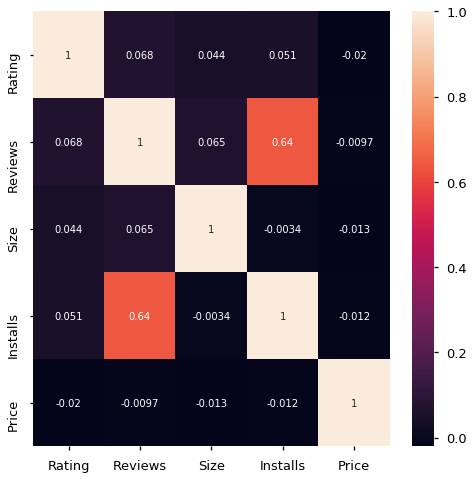

In [235]:
# Verificando a correlação dos valores float
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(dataF.corr(),annot=True)

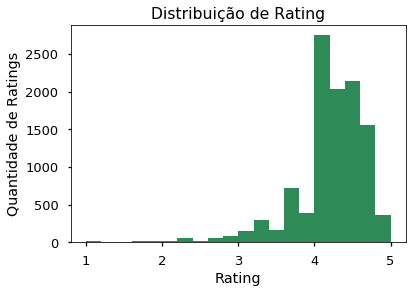

In [236]:
# Histograma do Rating
plt.hist(dataF['Rating'], bins = 20, color='SeaGreen')
plt.xlabel("Rating")
plt.ylabel("Quantidade de Ratings")
plt.title("Distribuição de Rating")
plt.show()

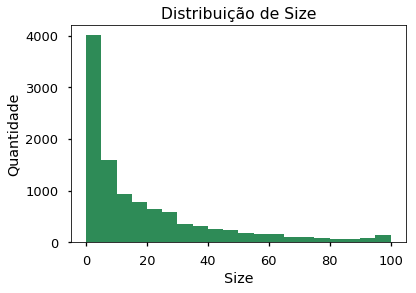

In [237]:
# Histograma do Size
plt.hist(dataF['Size'], bins = 20, color='SeaGreen')
plt.xlabel("Size")
plt.ylabel("Quantidade")
plt.title("Distribuição de Size")
plt.show()

In [238]:
installs = (dataF['Installs'] - dataF['Installs'].mean() )/ (dataF['Installs'].std())
reviews = (dataF['Reviews'] - dataF['Reviews'].mean() )/ (dataF['Reviews'].std())
rating =(dataF['Rating'] - dataF['Rating'].mean() )/ (dataF['Rating'].std())

In [239]:
#plt.figure(figsize=(12, 10), dpi=60)
#plt.scatter(range(len(dataF['Installs']/100)), dataF['Size']/100, c = dataF['Installs'])

Text(0.5, 1.0, 'Gráfico de Dispersão das Reviews')

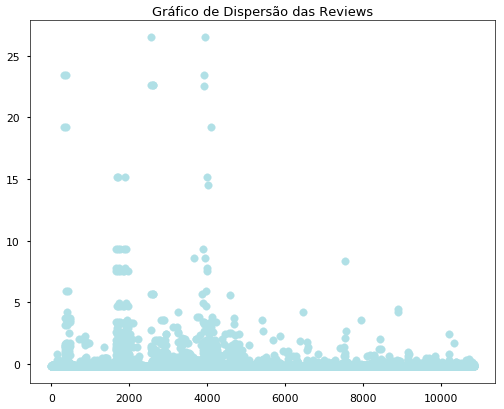

In [240]:
#dataNormalize = (data - data.mean() )/ (data.std())

# Gráfico de Dispersão (scatter Plot) da variável reviews 
# colorido por marcadores da variável Installs

plt.figure(figsize=(10, 8), dpi=60)
plt.scatter(range(reviews.size), reviews, c='PowderBlue')
plt.title('Gráfico de Dispersão das Reviews')


## Visualizando os Aplicativos da Categoria 'MEDICAL' 

In [262]:
# selecionando apenas a categoria Médica
medical = dataO[dataO.Category == 'MEDICAL']
medical.head()

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2243,Monash Uni Low FODMAP Diet,MEDICAL,Paid,Everyone,Medical,"July 16, 2018",2.0.7,4.0 and up
2244,iBP Blood Pressure,MEDICAL,Paid,Everyone,Medical,"November 30, 2014",7.0.1,2.2 and up
2245,Pedi STAT,MEDICAL,Paid,Everyone,Medical,"April 6, 2018",3.0.1.0,4.1 and up
2246,ASCCP Mobile,MEDICAL,Paid,Everyone,Medical,"October 3, 2016",2.1.1,2.2 and up
2247,Journal Club: Medicine,MEDICAL,Paid,Everyone,Medical,"June 17, 2017",0,Varies with device


In [386]:
# quantidade de app com a categoria Medical
medical.count().Type

463

In [389]:
# Visualizando a quantidade de Apps Free e Paid
paid = [x for x in medical.Type if x =='Paid']
free = [x for x in medical.Type if x =='Free']
print('Dos aplicativos da categoria MEDICAL:') 
print(len(paid), 'são pagos')
print(len(free), 'são gratuitos')

Dos aplicativos da categoria MEDICAL:
109 são pagos
354 são gratuitos


In [390]:
# Agrupando as duas categorias e visualizando a sua distribuição
labels = medical.groupby('Type')
types = labels.count().App
types

Type
Free    354
Paid    109
Name: App, dtype: int64

In [391]:
# separando os tipos de aplicativo e a sua respectiva quantidade
tipos = types.index
quantidade = types.values

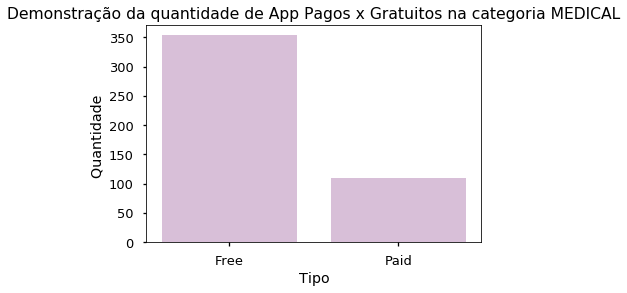

In [392]:
# Plotando o gráfico para melhor visualização
plt.bar(tipos, quantidade, color ='Thistle')
plt.xlabel('Tipo')
plt.ylabel('Quantidade ')
plt.title('Demonstração da quantidade de App Pagos x Gratuitos na categoria MEDICAL')
plt.show()

## 100 Mais baixados divididos por categorias

In [396]:
# visualizando os mais baixados em ordem decrescente
qtInstalls = data.sort_values(by=['Installs'], inplace=False, ascending=False).head(100)

In [397]:
# agrupando por categoria do aplicativo
catInstalls = qtInstalls.groupby('Category')
catGroup = catInstalls.count().App
catGroup

Category
BOOKS_AND_REFERENCE     1
COMMUNICATION          28
ENTERTAINMENT           1
FAMILY                  1
GAME                   15
HEALTH_AND_FITNESS      1
NEWS_AND_MAGAZINES      9
PHOTOGRAPHY             4
PRODUCTIVITY           10
SOCIAL                 12
TOOLS                   9
TRAVEL_AND_LOCAL        5
VIDEO_PLAYERS           4
Name: App, dtype: int64

In [398]:
# armazenando os nomes dos aplicativos
labels = catGroup.index
labels

Index(['BOOKS_AND_REFERENCE', 'COMMUNICATION', 'ENTERTAINMENT', 'FAMILY',
       'GAME', 'HEALTH_AND_FITNESS', 'NEWS_AND_MAGAZINES', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'SOCIAL', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS'],
      dtype='object', name='Category')

In [399]:
# armazenando o quantidade de aplicativos baixados de determinada categoria
sizes = catGroup.values
sizes

array([ 1, 28,  1,  1, 15,  1,  9,  4, 10, 12,  9,  5,  4])

In [400]:
# definindo as cores
colors ='DarkKhaki', 'Goldenrod', 'DarkGoldenrod', 'Peru', 'Chocolate', 'SandyBrown', 'NavajoWhite', 'BurlyWood', 'IndianRed', 'LightSalmon', 'Khaki', 'OldLace', 'Sienna'

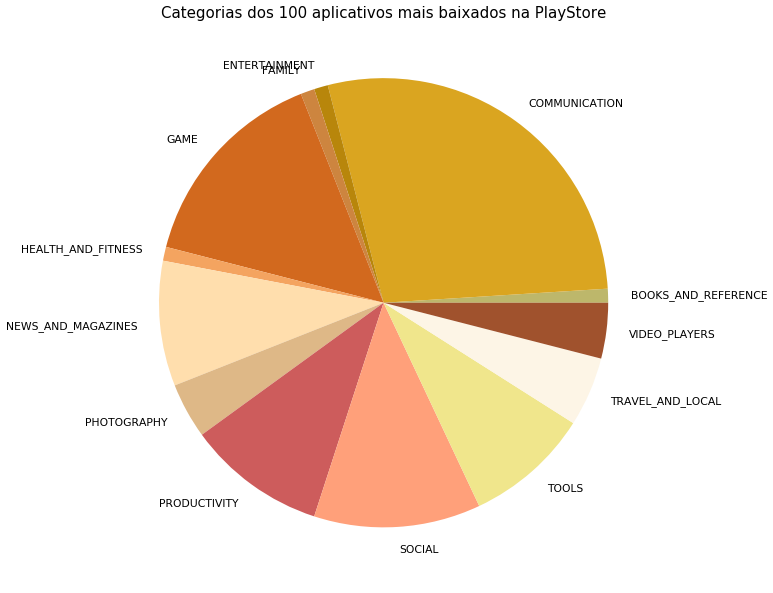

In [405]:
# definindo um gráfico de pizza para visualizar as categorias dos 100 mais baixados
plt.figure(figsize=(14, 10), dpi=60)
plt.pie(sizes, labels = labels, colors = colors)
plt.title('Categorias dos 100 aplicativos mais baixados na PlayStore', fontsize = 18)
plt.tight_layout()
plt.show()

## Quantidade de App por Categoria

In [406]:
# Agrupando a quantidade de aplicativos por categoria
qtApp = data.groupby('Category')
appPorCat = qtApp.count().App
appPorCat

Category
1.9                       1
ART_AND_DESIGN           65
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     231
BUSINESS                460
COMICS                   60
COMMUNICATION           387
DATING                  234
EDUCATION               156
ENTERTAINMENT           149
EVENTS                   64
FAMILY                 1972
FINANCE                 366
FOOD_AND_DRINK          127
GAME                   1144
HEALTH_AND_FITNESS      341
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
LIFESTYLE               382
MAPS_AND_NAVIGATION     137
MEDICAL                 463
NEWS_AND_MAGAZINES      283
PARENTING                60
PERSONALIZATION         392
PHOTOGRAPHY             335
PRODUCTIVITY            424
SHOPPING                260
SOCIAL                  295
SPORTS                  384
TOOLS                   843
TRAVEL_AND_LOCAL        258
VIDEO_PLAYERS           175
WEATHER                  82
Name: App, dtype: int64

In [407]:
# armazena os nomes do aplicativos
objects = appPorCat.index
objects

Index(['1.9', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING',
       'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE',
       'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL',
       'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS',
       'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER'],
      dtype='object', name='Category')

In [408]:
# armazena a quantidade dos aplicativos 
qt = appPorCat.values
qt

array([   1,   65,   85,   53,  231,  460,   60,  387,  234,  156,  149,
         64, 1972,  366,  127, 1144,  341,   88,   85,  382,  137,  463,
        283,   60,  392,  335,  424,  260,  295,  384,  843,  258,  175,
         82])

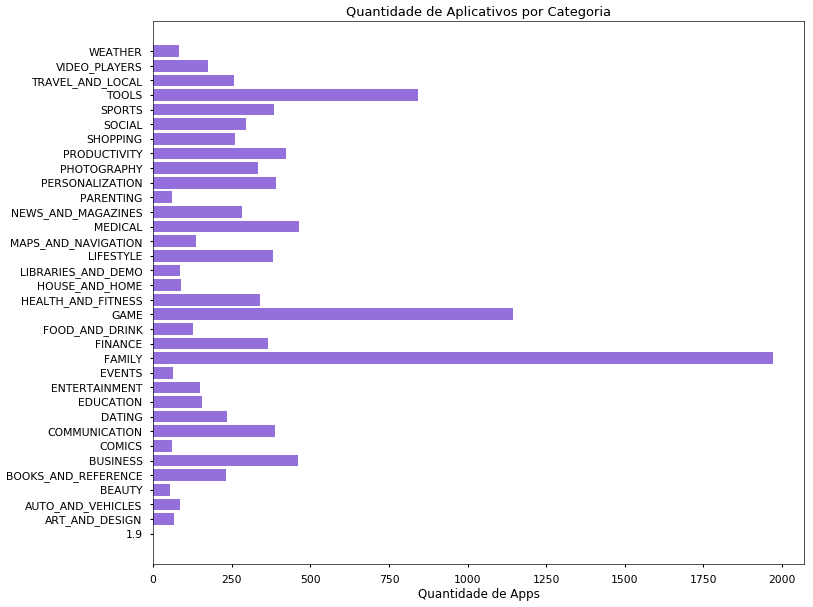

In [409]:
plt.figure(figsize=(14, 12), dpi=60)
plt.barh(objects, qt, color='MediumPurple')
plt.xlabel('Quantidade de Apps')
plt.title('Quantidade de Aplicativos por Categoria')
plt.show()

## Quantidade de Reviews por Rating

In [410]:
# Usando os valores do dataF (convertidos em Float)
rating = dataF.groupby('Rating')   # avaliações (notas)

In [411]:
# quantidade de reviews para cada nota
qtReview = rating.count().Reviews
qtReview.head()

Rating
1.0    16
1.2     1
1.4     3
1.5     3
1.6     4
Name: Reviews, dtype: int64

In [412]:
label = qtReview.index
values = qtReview.values


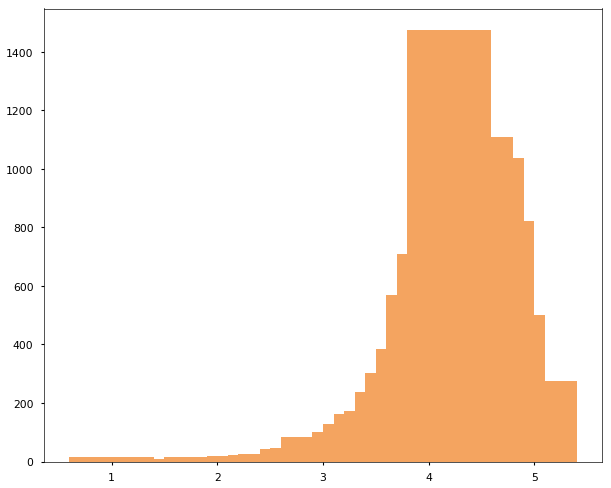

In [413]:
plt.figure(figsize=(12, 10), dpi=60)
plt.bar(label, values, color='SandyBrown')
plt.xlabel('')
plt.title('')
plt.show()